In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('fashion-mnist-train.csv')
test_data = pd.read_csv('fashion-mnist-test.csv')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
training = np.array(train_data, dtype = 'float32')
testing = np.array(test_data, dtype = 'float32')

In [7]:
training.shape

(60000, 785)

In [8]:
testing.shape

(10000, 785)

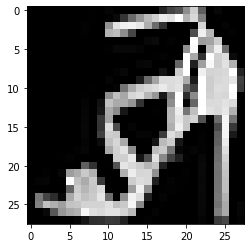

In [9]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28), cmap = 'gray')

In [10]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [11]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [12]:
X_train = X_train.reshape( X_train.shape[0], *(28,28,1))
X_test = X_test.reshape( X_test.shape[0], *(28,28,1))


In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
y_train.shape

(60000,)

In [15]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [16]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [17]:
epochs_hist = cnn.fit(X_train, y_train, batch_size = 512, epochs = 150)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8662 - accuracy: 0.7006
Epoch 2/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4923 - accuracy: 0.8198
Epoch 3/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4191 - accuracy: 0.8489
Epoch 4/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3739 - accuracy: 0.8666
Epoch 5/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3450 - accuracy: 0.8764
Epoch 6/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3284 - accuracy: 0.8820
Epoch 7/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3095 - accuracy: 0.8888
Epoch 8/150
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2993 - accuracy: 0.8923
Epoch 9/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2855 - accuracy: 0.8961
Epoch

60000/60000 [==============================] - 2s 29us/sample - loss: 0.0190 - accuracy: 0.9940
Epoch 77/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0249 - accuracy: 0.9912
Epoch 78/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0236 - accuracy: 0.9921
Epoch 79/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0380 - accuracy: 0.9861
Epoch 80/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0169 - accuracy: 0.9947
Epoch 81/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0165 - accuracy: 0.9947
Epoch 82/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0276 - accuracy: 0.9901
Epoch 83/150
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0276 - accuracy: 0.9901
Epoch 84/150
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0138 - accuracy: 0.9961
Epoch 85/150
60000/60000 [======

60000/60000 [==============================] - 1s 23us/sample - loss: 1.6102e-04 - accuracy: 1.0000
Epoch 149/150
60000/60000 [==============================] - 1s 23us/sample - loss: 1.5500e-04 - accuracy: 1.0000
Epoch 150/150
60000/60000 [==============================] - 2s 26us/sample - loss: 1.4035e-04 - accuracy: 1.0000


In [18]:
evaluation = cnn.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
predicted_classes = cnn.predict_classes(X_test)

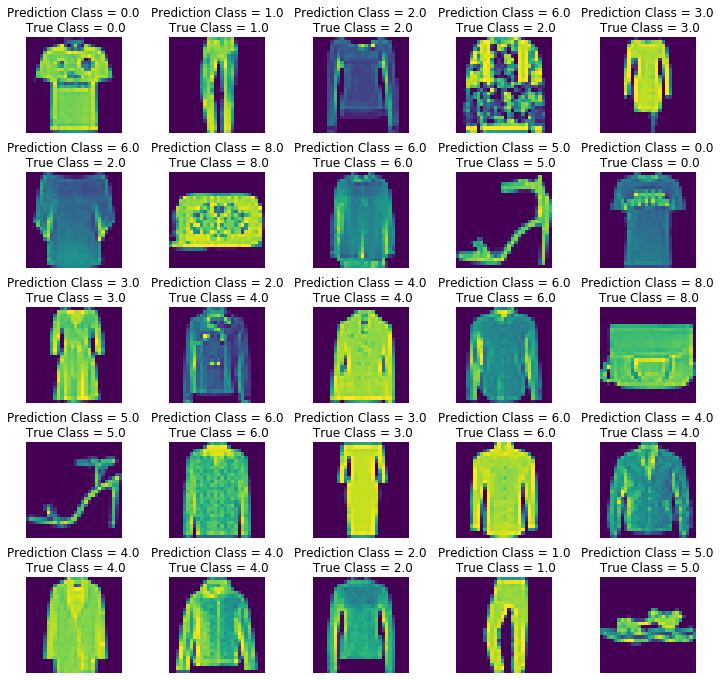

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


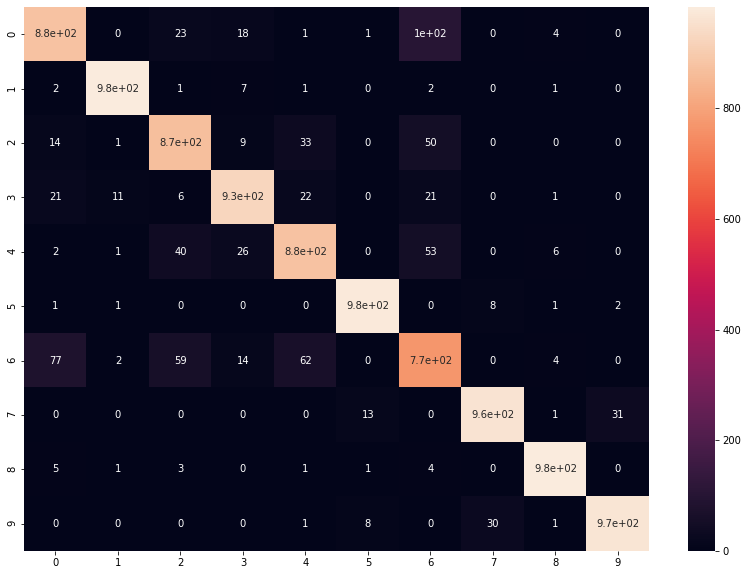

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(conf_mat, annot=True)

In [30]:
from sklearn.metrics import classification_report

num_classes = 10

target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.89      0.87      0.88      1000
     class 3       0.92      0.93      0.92      1000
     class 4       0.87      0.88      0.88      1000
     class 5       0.99      0.98      0.98      1000
     class 6       0.78      0.77      0.77      1000
     class 7       0.96      0.96      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

